In [1]:
x=0

0

In [2]:
using FinancialFFT

┌ Info: Precompiling FinancialFFT [ccc4acef-1676-4a84-946d-4093fe376f06]
└ @ Base loading.jl:1423
┌ Warning: Package FinancialFFT does not have LinearAlgebra in its dependencies:
│ - If you have FinancialFFT checked out for development and have
│   added LinearAlgebra as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with FinancialFFT
└ Loading LinearAlgebra into FinancialFFT from project dependency, future warnings for FinancialFFT are suppressed.


In [3]:
using Plots

In [4]:
x=1:10;

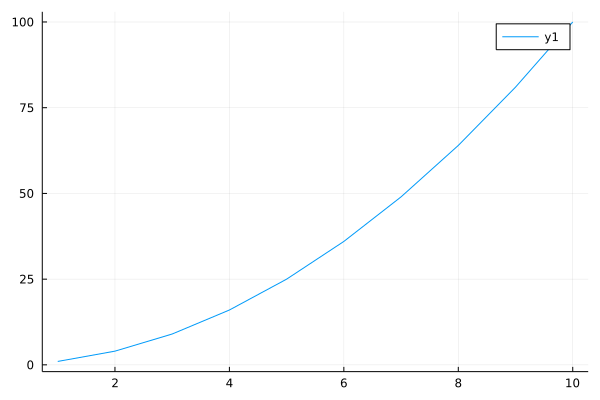

In [5]:
plot(x,x.^2)

In [6]:
using FinancialToolbox, DualNumbers, FinancialFFT, FinancialMonteCarlo

A = 600.0;
N = 16;

method = CarrMadanMethod(A, N);
method_cml = CarrMadanLewisMethod(A, N);
method_l = LewisMethod(A, N);
#S0 = dual(100.0,1.0);
S0=100.0
#S0 = hyper(100.0, 1.0, 1.0, 0.0);
K = 100.0;
r = 0.02;
T = 1.0;
d = 0.0;
#sigma = 0.2;
# sigma = hyper(0.2, 1.0, 1.0, 0.0);
sigma = dual(0.2, 1.0);
lam = 5.0;
mu1 = 0.03;
sigma1 = 0.02;
zero_rate = ZeroRate(r);

#Model = MertonProcess(sigma, lam, mu1, sigma1, Underlying(S0, d));
Model = NormalInverseGaussianProcess(sigma, 0.01, 0.11, Underlying(S0, d));
#Model = BlackScholesProcess(sigma, Underlying(S0, d));
Nsim = 10000;
Nstep = 30;
mc = MonteCarloConfiguration(Nsim, Nstep);

#@time @show pricer(Model, zero_rate, method, options);
#@time @show pricer(Model, zero_rate, method_cml, options);
#@time @show pricer(Model, zero_rate, method_l, options);
#@time @show pricer(Model, zero_rate, mc, options);
#typeof(Model) <: BlackScholesProcess ? @time(@show(blsprice(S0, K, r, T, sigma, d))) : nothing;

In [7]:
strikes=collect(20.0:1.0:200.0);

In [8]:
options=[EuropeanOption(T,k) for k in strikes];

In [9]:
prices=pricer(Model, zero_rate, method_cml, options);
prices_mc=pricer(Model, zero_rate, mc, options);

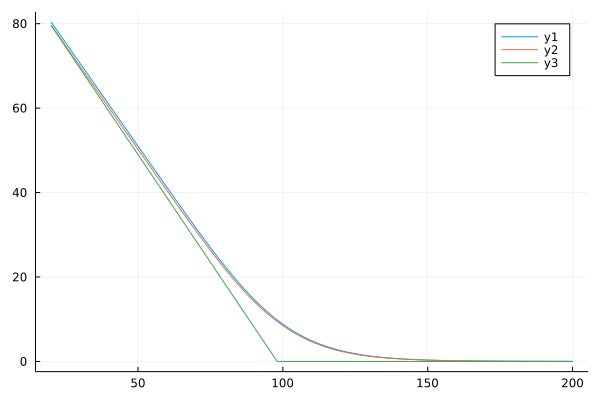

In [10]:
plot(strikes,DualNumbers.value.(prices))
plot!(strikes,DualNumbers.value.(prices_mc))
plot!(strikes,max.(S0 .-strikes*exp(r*T),0.0))

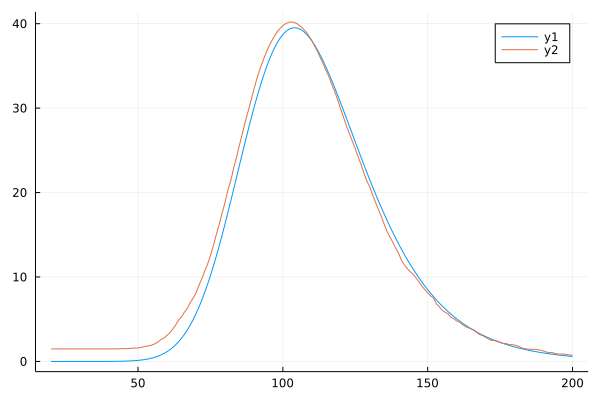

In [11]:
plot(strikes,DualNumbers.epsilon.(prices))
plot!(strikes,DualNumbers.epsilon.(prices_mc))
# plot!(strikes,strikes.*0 .+1)
# plot!(strikes,strikes.*0)

In [12]:
using Interact
ui = button()
display(ui)

WebIO._IJuliaInit()

(div { className="field interact-widget" }
    (button { attributes=Dict{Any, Any}("data-bind" => "click: function (){this.clicks(this.clicks()+1)}, css: {'is-loading' : loading}") className="is-medium button is-primary" style=Dict{String, Any}() }
    "Press me!"))

In [13]:
options = ["a", "b", "c"]
wdg = dropdown(options)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :select), Any[], Dict{Symbol, Any}(:attributes => Dict{Union{String, Symbol}, Any}(Symbol("data-bind") => "options : options_js, value : index, optionsText: 'key', optionsValue: 'val', valueAllowUnset: true, optionsAfterRender: disablePlaceholder")))], Dict{Symbol, Any}(:className => "select ")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "a", "val" => 1, "id" => "idaxkz8baR"), OrderedDict{String, Any}("key" => "b", "val" => 2, "id" => "idn9DyyAZe"), OrderedDict{String, Any}("key" => "c", "val" => 3, "id" => "idzjTABgVf")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007aefdb30, Task (runnable) @0x000000007aefdb30), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"4945771324932009526\",\"id\":\"1951741969338490527\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"4945771324932009526\",\"id\":\"14371224857200137597\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        [this[\"disablePlaceholder\"]=function(option, item) {\n    ko.applyBindingsToNode(option, {disable: item.val == 0}, item);\n}\n]\n        \n        [this[\"options_js\"].subscribe((function (val){!(this.valueFromJulia[

In [14]:
options = Observable(["a", "b", "c"])
wdg = radiobuttons(options)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:attributes => Dict{String, Any}("name" => Symbol("##277"), "type" => "radio", "data-bind" => "checked : \$root.index, checkedValue: val, attr : {id : id}"), :className => "is-checkradio ")), Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key, attr : {for : id}")))], Dict{Symbol, Any}(:className => "field"))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "foreach : options_js"), :className => :field)), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "a", "val" => 1, "id" => "idMmF6soL9"), OrderedDict{String, Any}("key" => "b", "val" => 2, "id" => "idsmXYAYRT"), OrderedDict{String, Any}("key" => "c", "val" => 3, "id" => "idw1nPdivG")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000c5d4da0, Task (runnable) @0x000000000c5d4da0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"3124780532157343177\",\"id\":\"5410576938546096250\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"3124780532157343177\",\"id\":\"14475638364139748713\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : k

In [15]:
options[] = ["a", "b", "c"]

3-element Vector{String}:
 "a"
 "b"
 "c"

In [16]:
wdg.output

Observable{Any} with 1 listeners. Value:
"a"

In [17]:
options = Observable(["a", "b", "c"])
wdg = checkboxes(options)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:attributes => Dict{String, Any}("name" => Symbol("##278"), "type" => "checkbox", "data-bind" => "checked : \$root.index, checkedValue: val, attr : {id : id}"), :className => "is-checkradio ")), Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key, attr : {for : id}")))], Dict{Symbol, Any}(:className => "field"))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "foreach : options_js"), :className => :field)), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "a", "val" => 1, "id" => "idKdSKDLun"), OrderedDict{String, Any}("key" => "b", "val" => 2, "id" => "id3WCpdxcY"), OrderedDict{String, Any}("key" => "c", "val" => 3, "id" => "idiCgGOye8")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
Int64[], nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000735b0da0, Task (runnable) @0x00000000735b0da0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"82154961558816430\",\"id\":\"12362658670753983521\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"82154961558816430\",\"id\":\"9629279971932626778\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el

In [18]:
wdg.output

Observable{Any} with 1 listeners. Value:
String[]

In [19]:
options = Observable(["a", "b", "c"])
wdg = toggles(options)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:attributes => Dict{String, Any}("name" => Symbol("##279"), "type" => "checkbox", "data-bind" => "checked : \$root.index, checkedValue: val, attr : {id : id}"), :className => "switch ")), Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key, attr : {for : id}")))], Dict{Symbol, Any}(:className => "field"))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "foreach : options_js"), :className => :field)), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "a", "val" => 1, "id" => "idtE2dNasp"), OrderedDict{String, Any}("key" => "b", "val" => 2, "id" => "idllcukInP"), OrderedDict{String, Any}("key" => "c", "val" => 3, "id" => "id2AjUioEC")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
Int64[], nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000775d6100, Task (runnable) @0x00000000775d6100), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"6414302014893663425\",\"id\":\"12835565863395506601\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"6414302014893663425\",\"id\":\"15702833974389284556\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) 

In [20]:
wdg.output

Observable{Any} with 1 listeners. Value:
String[]

In [21]:
options = Observable(["a", "b", "c"])
wdg = tabs(options)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :ul), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :li), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :a), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.index(val)}, css: {'is-active' : \$root.index() == val, 'interact-widget not-active ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js")))], Dict{Symbol, Any}(:className => "tabs")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "a", "val" => 1, "id" => "idDeNg6ySd"), OrderedDict{String, Any}("key" => "b", "val" => 2, "id" => "id2CQKlr7p"), OrderedDict{String, Any}("key" => "c", "val" => 3, "id" => "id65Fbavfu")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000735d5940, Task (runnable) @0x00000000735d5940), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"16432123630599349140\",\"id\":\"4704991544799060551\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"16432123630599349140\",\"id\":\"4352370928587692781\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"options_js\"].subscri

In [22]:
tabulator(OrderedDict("plot" => plot(rand(10)), "scatter" => scatter(rand(10))), index = 1)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :ul), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :li), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :a), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.index(val)}, css: {'is-active' : \$root.index() == val, 'interact-widget not-active ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js")))], Dict{Symbol, Any}(:className => "tabs")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "plot", "val" => 1, "id" => "idqZreHJ8t"), OrderedDict{String, Any}("key" => "scatter", "val" => 2, "id" => "idfonqCk2x")], nothing), "index" => (Observable{Any} with 5 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007a5e3270, Task (runnable) @0x000000007a5e3270), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"9266698356681849233\",\"id\":\"15145375361002296869\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"9266698356681849233\",\"id\":\"5039885729253750180\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"options_js\"].subscribe((function (val){!(t

In [23]:
#wdg = mask(OrderedDict("plot" => plot(rand(10)), "scatter" => scatter(rand(10))), index = 1)
wdg = mask(OrderedDict("plot" => plot(rand(10)), "scatter" => scatter(rand(10))), key = "plot")

Observable{Scope} with 0 listeners. Value:
Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Plot{Plots.GRBackend() n=1}], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "visible: index() == 1"))), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Plot{Plots.GRBackend() n=1}], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "visible: index() == 2")))], Dict{Symbol, Any}()), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js")], Dict{Any, Any}("index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000079ebb840, Task (runnable) @0x0000000079ebb840), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"10588960383209977546\",\"id\":\"3952251334554938420\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"index\"].subscribe((function (val){!(this.valueFromJulia[\"index\"]) ? (WebIO.setval({\"name\":\"index\",\"scope\":\"10588960383209977546\",\"id\":\"3952251334554938420\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"index\"]=false}),self)]\n        \n    }\n    self.model = new AppViewModel();\n    self.valueFromJulia = {};\n    for (var key in json_data) {\n        self.valueFromJulia[key] = false;\n    }\n    ko.applyBindings(self.model, self.dom);\n}\n);\n    (WebIO.importBlock({\"data\":[{\"name\":\"knockout\",\"type\":\"js\",\"url\":\"/assetserver/cd52ad7de7c327abd6b68dc1bd25d79142356a47-knockout.js\"},{\"name\":\"knockout_punches\",\"type\":\"js\",\"url\":\"/assetserver/da12da9541c1d1dd446b78967e81289c2ac33df8-knockout_punches.js\"}],\"type\":\"async_block\"})).then((imports) => handler.apply(this, imports));\n}\n")])

In [24]:
#wdg[:options] .= ["c", "d", "e"]

In [25]:
latex("\\sum_{i=1}^{\\infty} e^i")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}(:id => "container")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("value" => (Observable{String} with 1 listeners. Value:
"\\sum_{i=1}^{\\infty} e^i", nothing)), Set{String}(), nothing, Asset[Asset("js", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\katex.min.js"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\katex.min.css")], Dict{Any, Any}("value" => Any[WebIO.JSString("(function (txt){return this.k.render(txt,this.container)})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007976d750, Task (runnable) @0x000000007976d750), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = ((function (k){this.k=k; this.container=this.dom.querySelector(\"#container\"); return k.render(\"\\\\sum_{i=1}^{\\\\infty} e^i\",this.container)}));\n    (WebIO.importBlock({\"data\":[{\"name\":null,\"type\":\"js\",\"url\":\"/assetserver/5057ed7842aacd92d662307b6a32b16160e19afa-katex.min.js\"},{\"name\":null,\"type\":\"css\",\"url\":\"/assetserver/27886f83a0d68973f429631cc7282ba157b51d53-katex.min.css\"}],\"type\":\"async_block\"})).then((imports) => handler.apply(this, imports));\n}\n")])], Dict{Symbol, Any}(:className => "interact-widget"))

In [26]:
#wdd=widget(1.0:0.4:10.0)

In [27]:
@manipulate for i=1.0:0.4:10.0
    tabulator(OrderedDict("price" => plot(strikes,DualNumbers.value.(prices).^sin(i),labels="price"), "derivative" => plot(strikes,DualNumbers.epsilon.(prices),labels="price"),"derivative2" => plot(strikes,DualNumbers.epsilon.(prices).^i,labels="price")), index = 1)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 23, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
12, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007976f460, Task (runnable) @0x000000007976f460), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1.0\",\"1.4\",\"1.8\",\"2.2\",\"2.6\",\"3.0\",\"3.4\",\"3.8\",\"4.2\",\"4.6\",\"5.0\",\"5.4\",\"5.8\",\"6.2\",\"6.6\",\"7.0\",\"7.4\",\"7.8\",\"8.2\",\"8.6\",\"9.0\",\"9.4\",\"9.8\"],\"changes\":WebIO.getval({\

In [28]:
@manipulate for i=1.0:0.1:10.0
    plot(strikes,DualNumbers.value.(prices).^sin(i),labels="price")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 91, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
46, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007a3b8da0, Task (runnable) @0x000000007a3b8da0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1.0\",\"1.1\",\"1.2\",\"1.3\",\"1.4\",\"1.5\",\"1.6\",\"1.7\",\"1.8\",\"1.9\",\"2.0\",\"2.1\",\"2.2\",\"2.3\",\"2.4\",\"2.5\",\"2.6\",\"2.7\",\"2.8\",\"2.9\",\"3.0\",\"3.1\",\"3.2\",\"3.3\",\"3.4\",\"3.5\",\"3.

In [29]:
using Interact
#options = ["a", "b", "c"]
#wdg = dropdown(options)

cpt = OrderedDict(:b => slider(1:100), :c => button(), :d => dropdown(["a","b","c"]), :r => dropdown(["a","b","c"]));

t = Widget{:test}(cpt);

#Widgets.@layout t vbox(:b, CSSUtil.vskip(1em), :c);

Widgets.@layout! t vbox(hbox(:b, CSSUtil.hskip(1em), :c, CSSUtil.hskip(3em), :d, CSSUtil.hskip(3em), :r),hbox(:b, CSSUtil.hskip(1em), :c, CSSUtil.hskip(3em), :d, CSSUtil.hskip(3em), :r));
#Widgets.@layout! t hbox(:b, CSSUtil.hskip(1em), :c, CSSUtil.hskip(3em), :d, CSSUtil.hskip(3em), :r);
#Widgets.@layout t Widgets.@map &(:vertical) ? vbox(:b, CSSUtil.vskip(1em), :c) : hbox(:b, CSSUtil.hskip(1em), :c);

In [30]:
display(t);

(div { style=Dict("display" => "flex", "flex-direction" => "column") }
  (div { style=Dict("display" => "flex", "flex-direction" => "row") }
    Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 100, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 1 listeners. Value:
50, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000789cd940, Task (runnable) @0x00000000789cd940), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\

In [31]:
observe(t.components[:b])

Observable{Int64} with 1 listeners. Value:
50

In [32]:
cpt[:b][]

50

In [33]:
d = OrderedDict(:label => "My label", :button => button("My button"))
output = map(t -> t > 5 ? "You pressed me many times" : "You didn't press me enough", d[:button])
w = Interact.Widget{:mywidget}(d, output = output)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["My label", Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :button), Any["My button"], Dict{Symbol, Any}(:attributes => Dict{Any, Any}("data-bind" => "click: function (){this.clicks(this.clicks()+1)}, css: {'is-loading' : loading}"), :className => "is-medium button is-primary", :style => Dict{String, Any}())), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("loading" => (Observable{Bool} with 1 listeners. Value:
false, nothing), "clicks" => (Observable{Int64} with 2 listeners. Value:
0, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("loading" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"loading\"]()) ? (this.valueFromJulia[\"loading\"]=true, this.model[\"loading\"](val)) : undefined})")], "clicks" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"clicks\"]()) ? (this.valueFromJulia[\"clicks\"]=true, this.model[\"clicks\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007a5e3080, Task (runnable) @0x000000007a5e3080), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"loading\":WebIO.getval({\"name\":\"loading\",\"scope\":\"12536331940636648540\",\"id\":\"8206196323519914547\",\"type\":\"observable\"}),\"clicks\":WebIO.getval({\"name\":\"clicks\",\"scope\":\"12536331940636648540\",\"id\":\"11446739310090833081\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"loading\"].subscribe((function (val){!(this.valueFromJulia[\"loading\"]) ? (WebIO.setval({\"name\":\"loading\",\"scope\":\"12536331940636648540\",\"id\":\"8206196323519914547\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"loading\"]=false}),self),this[\"clicks\"].subscribe((function (val){!(this.valueFromJulia[\"clicks\"]) ? (WebIO.setval({\"name\":\"clicks\",\"scope\":\"12536331940636648540\",\"id\":\"11446739310090833081\",\"type\":\"observabl

In [34]:
using Interact
#options = ["a", "b", "c"]
#wdg = dropdown(options)

cpt = OrderedDict(:spot => slider(0:200),:strike => slider(0:200),:zero_rate => slider(0:0.005:0.1), :c => button(), :model => dropdown(["BlackScholes","Kou","Merton"]), :option_type => dropdown(["European","Barrier",""]));

t = Widget{:test}(cpt);

#Widgets.@layout t vbox(:b, CSSUtil.vskip(1em), :c);

Widgets.@layout! t vbox(hbox(:spot, CSSUtil.hskip(1em), :c, CSSUtil.hskip(3em), :model, CSSUtil.hskip(3em), :option_type),hbox(:strike, CSSUtil.hskip(1em), :c, CSSUtil.hskip(3em), :model, CSSUtil.hskip(3em), :option_type),hbox(:zero_rate, CSSUtil.hskip(1em), :c, CSSUtil.hskip(3em), :model));
#Widgets.@layout! t hbox(:b, CSSUtil.hskip(1em), :c, CSSUtil.hskip(3em), :model, CSSUtil.hskip(3em), :option_type);
#Widgets.@layout! t Widgets.@map &(true) ? vbox(:spot, CSSUtil.vskip(1em), :zero_rate) : hbox(:spot, CSSUtil.hskip(1em), :zero_rate);
display(t)

(div { style=Dict("display" => "flex", "flex-direction" => "column") }
  (div { style=Dict("display" => "flex", "flex-direction" => "row") }
    Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 0, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 1 listeners. Value:
100, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\

In [35]:
using Interact
#options = ["a", "b", "c"]
#wdg = dropdown(options)

cpt = OrderedDict(:spot => slider(0:200),:strike => slider(0:200),:zero_rate => slider(0:0.005:0.1), :c => button(), :model => dropdown(["BlackScholes","Kou","Merton"]), :option_type => dropdown(["European","Barrier",""]), :method => dropdown(["MonteCarlo","FFT",""]));

t = Widget{:test}(cpt);

#Widgets.@layout t vbox(:b, CSSUtil.vskip(1em), :c);

Widgets.@layout! t hbox(vbox(:spot, CSSUtil.vskip(1em), :strike, CSSUtil.vskip(1em), :zero_rate),vbox(:model, CSSUtil.vskip(1em), :c, CSSUtil.vskip(3em), :model, CSSUtil.vskip(3em), :option_type),vbox(:option_type, CSSUtil.vskip(1em), :c, CSSUtil.vskip(3em), :model),vbox(:method, CSSUtil.vskip(1em), :c, CSSUtil.vskip(3em), :model));
#Widgets.@layout! t hbox(:b, CSSUtil.hskip(1em), :c, CSSUtil.hskip(3em), :model, CSSUtil.hskip(3em), :option_type);
#Widgets.@layout! t Widgets.@map &(true) ? vbox(:spot, CSSUtil.vskip(1em), :zero_rate) : hbox(:spot, CSSUtil.hskip(1em), :zero_rate);
display(t)

(div { style=Dict("display" => "flex", "flex-direction" => "row") }
  (div { style=Dict("display" => "flex", "flex-direction" => "column") }
    Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 0, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 1 listeners. Value:
100, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Nicola\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Nicola\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\